
# Logistic Regression, Decision Trees and Random Forest - Loan Eligibility Prediction






-----
## Context: 
-------

Banks earn profit by giving out loans and charging interest on those loans.   Bad loans (loans that default)  are a major source of risk for lenders since they eat away at profits and therefore, it is important for Banks to ensure that they don’t approve loans that are likely to default.   

The traditional loan approval process is labor intensive and prone to error,  requiring loan officers and underwriters to manually review  documents from various sources.  Recently, big data and machine learning  techniques have ushered in an age of  algorithms that can learn the loan approval process while increasing efficiency and reducing errors.  With this is mind, we are to build a predictive model that will simplify the decision making process for home equity lines of credit to be rejected.

More specifically , we will build a classification model to predict clients who are likely to default on their loan.  Logistic Regression, Decision Trees and Random Forests are standard classification models and we will select the best performing model from these.    Some key questions are: What kind of data can be used to build such a model and how easy is the data obtaining and processed.   What kind of expertise is needed to maintain such a model?   How can the model by deployed and used by users? 


---------
## Problem Statement:
------------
 Build a classification model to predict clients who are likely to default on their loan and give recommendations to the bank on what are important features to consider while approving the loan

--------
## Attributes Information:
------------

The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent ). 12 input variables were registered for each applicant.

* BAD: 1 = Client defaulted on loan, 0 = loan repaid 

* LOAN: Amount of loan approved.

* MORTDUE: Amount due on the existing mortgage.

* VALUE: Current value of the property.

* REASON: Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and           consumer debts)

* JOB: The type of job that loan applicant has such as manager, self, etc. 

* YOJ: Years at  present job.

* DEROG: Number of major derogatory reports (which indicates a serious delinquency or late payments).

* DELINQ: Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* CLAGE: Age of the oldest credit line in months. 

* NINQ: Number of recent credit inquiries. 

* CLNO: Number of existing credit lines.

* DEBTINC: Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

---------------------------

### Import Libraries and Load Dataset

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
#import pandas_profiling as pp
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import missingno as msno # for detecting missing values

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [3]:
#data = pd.read_csv('/content/drive/My Drive/Data Set.csv')
data = pd.read_csv('Data Set.csv')
data_original = data.copy()
#profile = ProfileReport(data, title="Pandas Profiling Report")

 <span style="font-family: Arial; font-weight:bold;font-size:2.3em;color:#fa9200;">EDA (Exploratory Data Analysis)

In [4]:
print("The shape of the data is ",data.shape)
print("\n")
print(data.info())

The shape of the data is  (5960, 13)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB
None


In [5]:
data.head(50)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [6]:
df=pd.concat([data.isnull().sum(),data.isnull().sum()/data.shape[0]*100], axis=1)
df.rename(columns={0:'# Null', 1:'% of Total'}, inplace=True)
print("Null Values")
print(df)
    

Null Values
         # Null  % of Total
BAD           0    0.000000
LOAN          0    0.000000
MORTDUE     518    8.691275
VALUE       112    1.879195
REASON      252    4.228188
JOB         279    4.681208
YOJ         515    8.640940
DEROG       708   11.879195
DELINQ      580    9.731544
CLAGE       308    5.167785
NINQ        510    8.557047
CLNO        222    3.724832
DEBTINC    1267   21.258389


**Observations:**
* Except for DEBTINC which has 21% missing, relatively few rows have null values.   These can be either dropped or imputed. 
* Dependent variable BAD has no missing values

<AxesSubplot:>

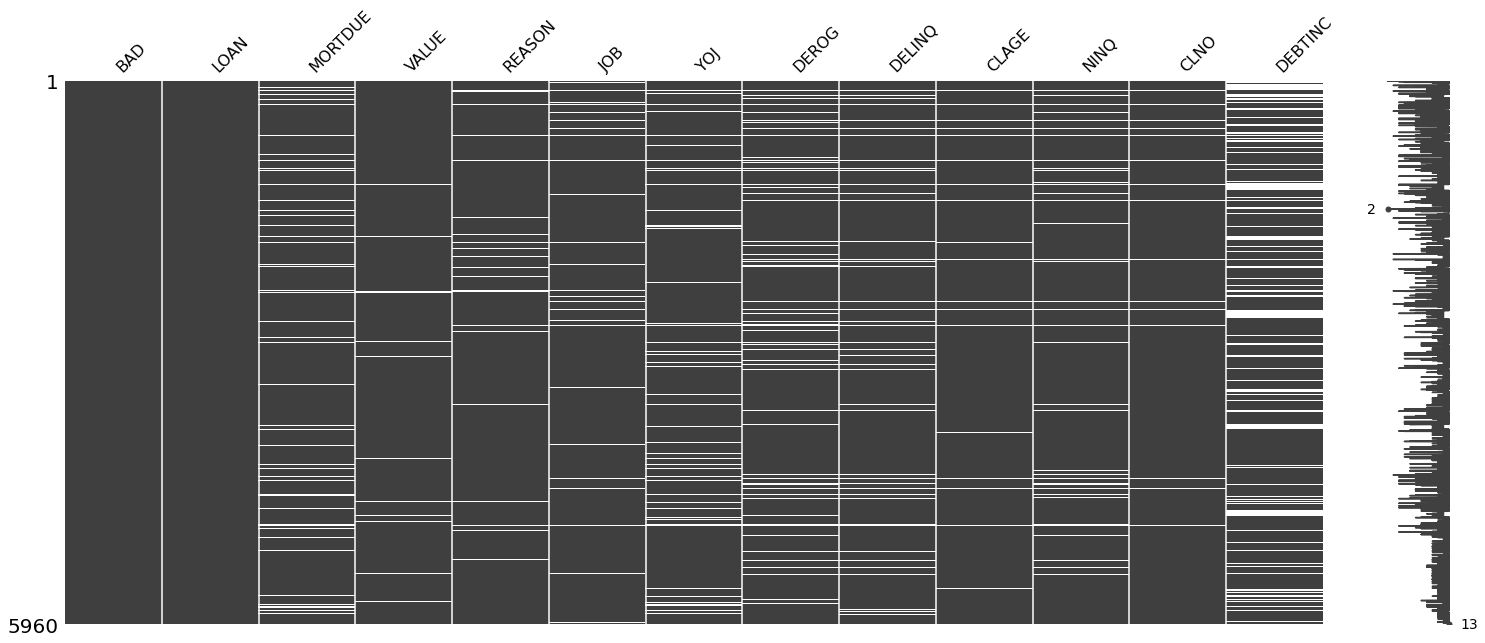

In [7]:
msno.matrix(data)

<AxesSubplot:>

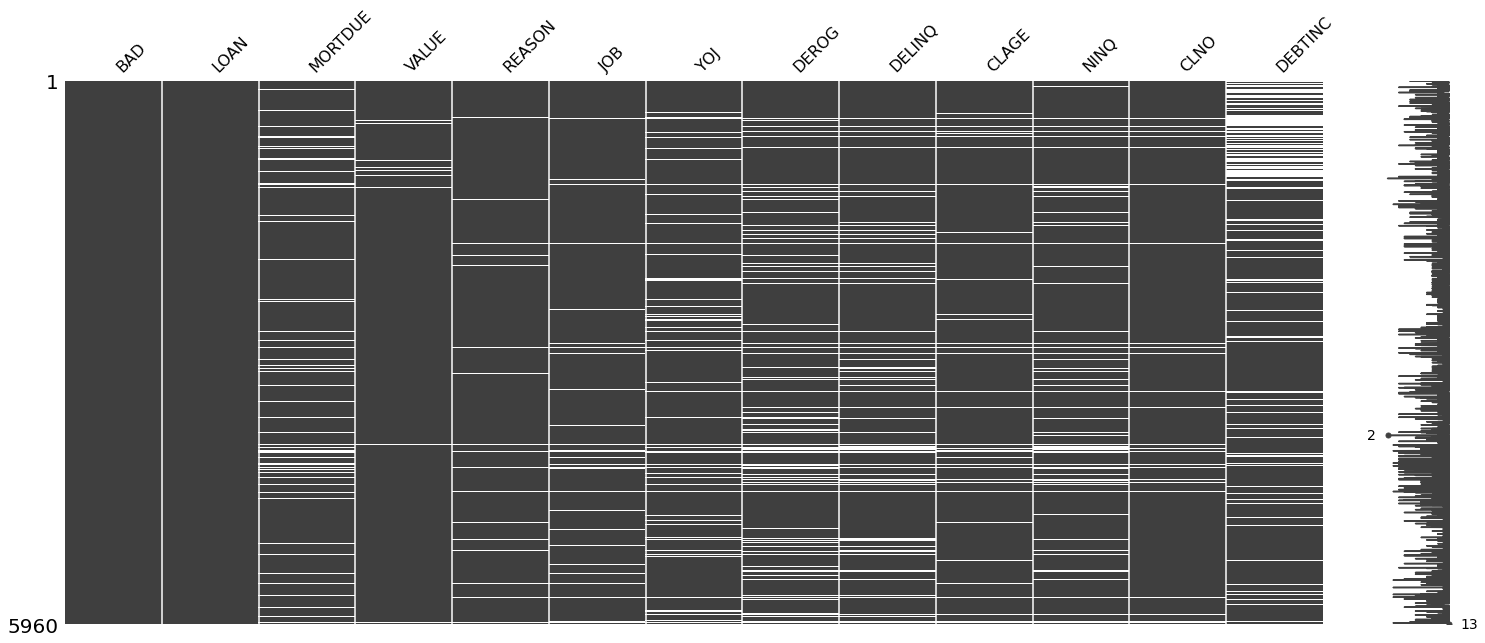

In [8]:
# Is there pattern in missing values 
#sorted by DEBTINC

sortedd = data.sort_values('BAD', ascending = False)
msno.matrix(sortedd)

**Observation:**
* Most of the missing values for DEBTINC are for default loans (BAD=1)


In [9]:
data.describe(percentiles=[.05,.25,.5,.75,.95]).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,5900.000000,11100.000000,16300.000000,23300.000000,40000.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,18232.400000,46276.000000,65019.000000,91488.000000,151999.550000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,39050.700000,66075.500000,89235.500000,119824.250000,203717.200000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,0.000000,3.000000,7.000000,13.000000,24.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,68.912654,115.116702,173.466667,231.562278,321.633333,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,0.000000,1.000000,2.000000,4.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,7.000000,15.000000,20.000000,26.000000,40.000000,71.000000


In [10]:
data.groupby('BAD').count()/data.count()

,BAD,CLAGE,CLNO,DEBTINC,DELINQ,DEROG,JOB,LOAN,MORTDUE,NINQ,REASON,VALUE,YOJ
BAD,,,,,,,,,,,,,
0,NaN,0.803432,0.802022,0.914127,0.792379,0.790175,0.794754,0.800503,0.800992,0.795596,0.800105,0.814637,0.793572
1,NaN,0.196568,0.197978,0.085873,0.207621,0.209825,0.205246,0.199497,0.199008,0.204404,0.199895,0.185363,0.206428


In [11]:
data.nunique() # Number of unique values in a column

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

***Univariate Data Analysis***

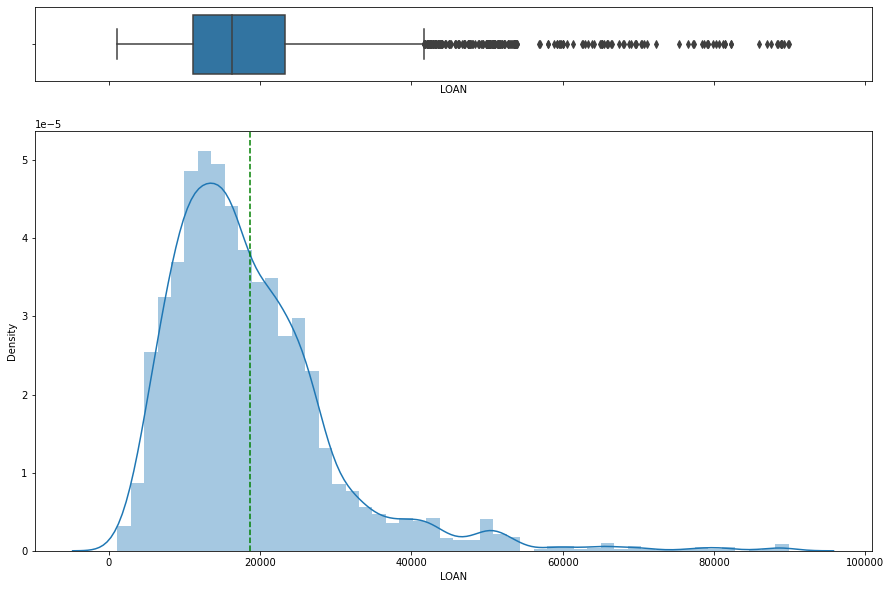

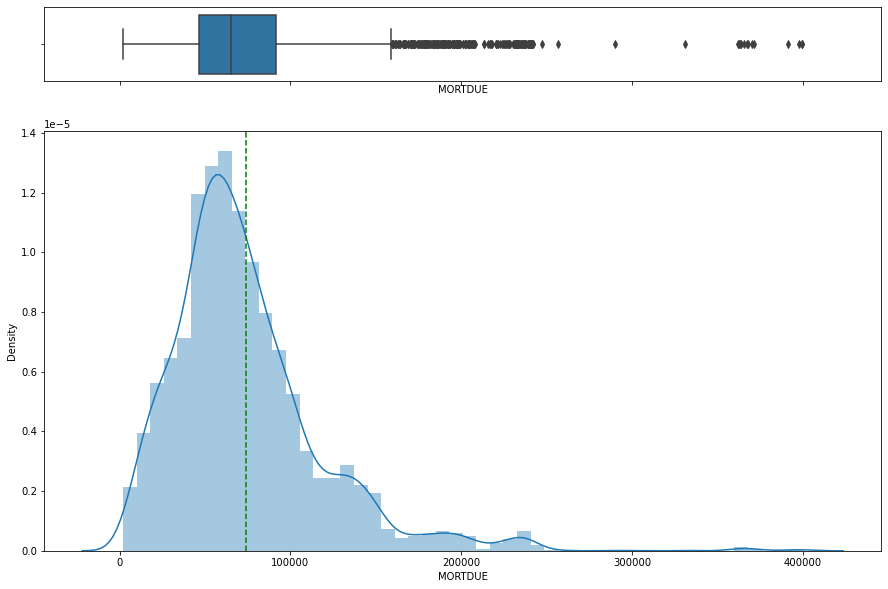

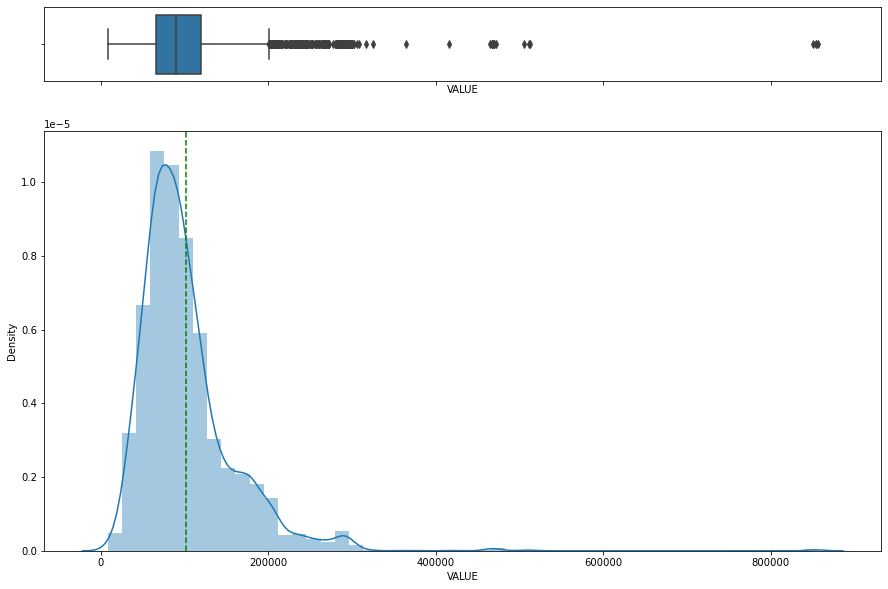

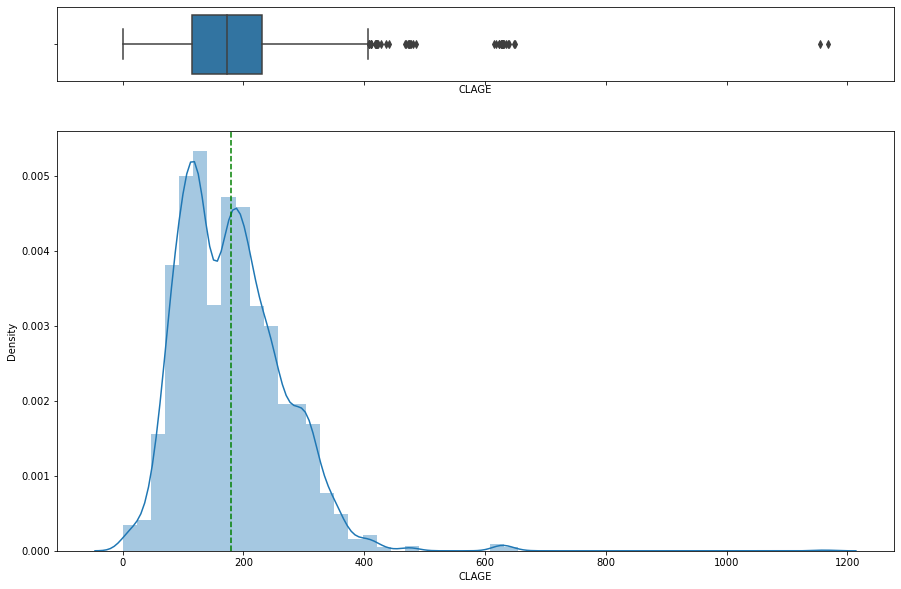

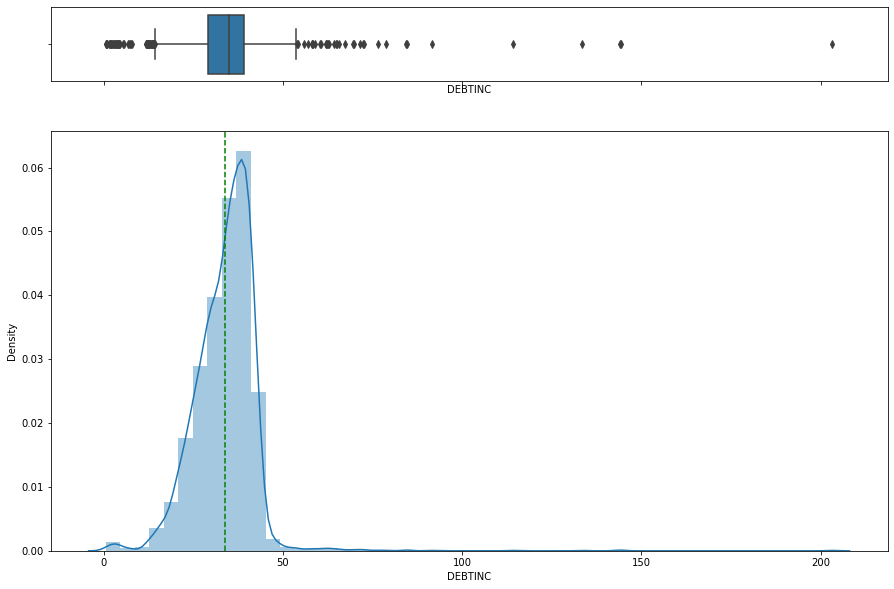

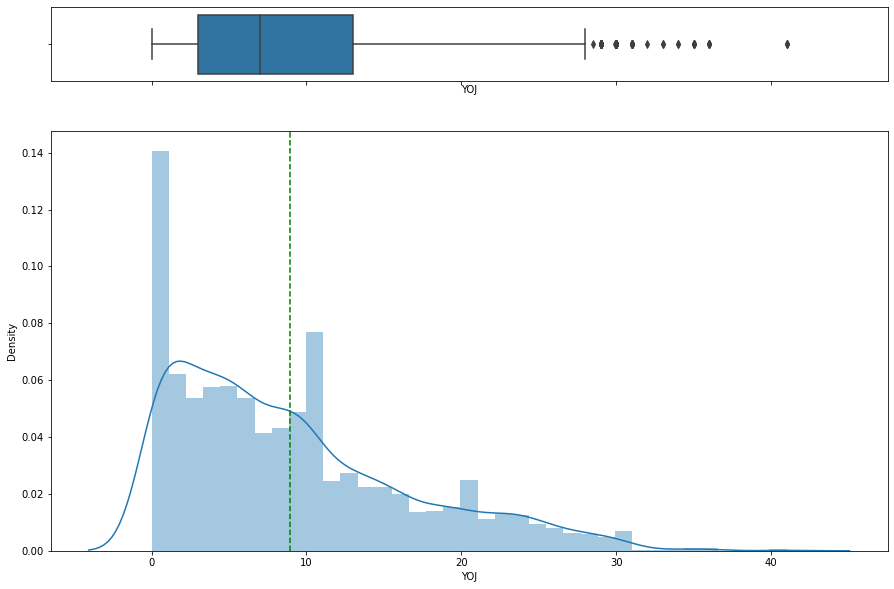

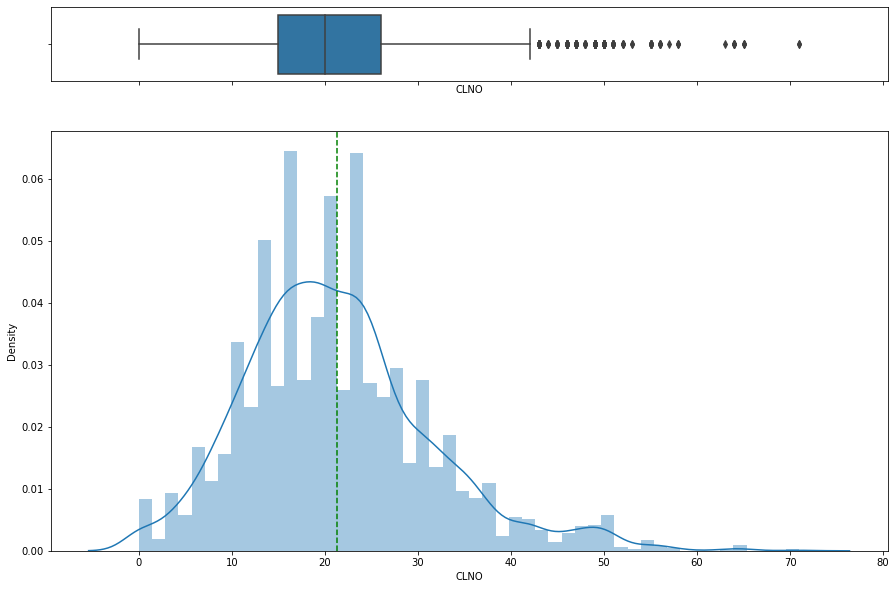

In [12]:
# distplot and boxplot for continous columns
for i in ['LOAN','MORTDUE','VALUE', 'CLAGE', 'DEBTINC','YOJ','CLNO']:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(15,10) )
    sns.boxplot(data[i], ax=ax_box)
    sns.distplot(data[i], ax=ax_hist)
    ax_hist.axvline(np.mean(data[i]), color='green', linestyle='--') 
    plt.show()

**Observations:**
* DEBTINC has lower and upper outliners, mean and median are close, so approx normal 
* VALUE, MORTDUE, LOAN, have outliners on the upper end and is skewed to the right


***Categorial Values***

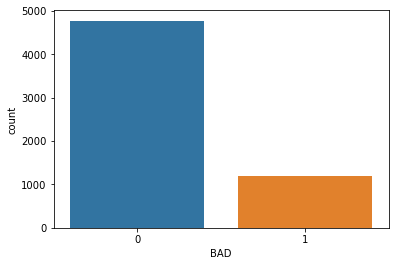

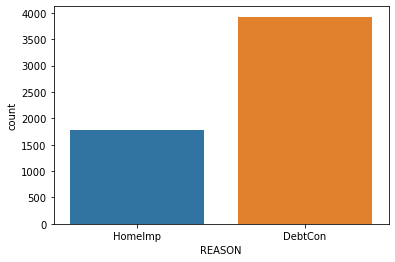

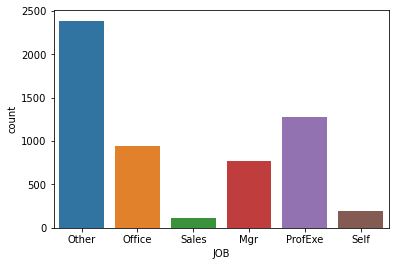

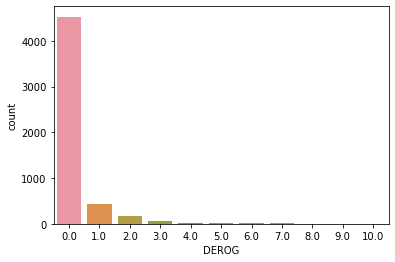

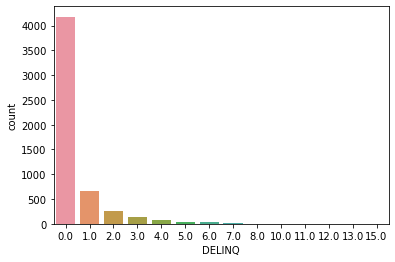

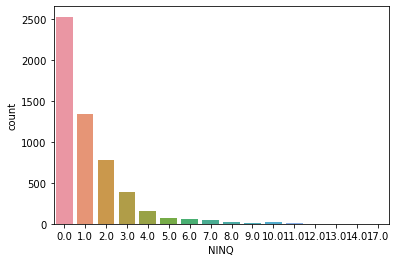

In [13]:
for i in ['BAD','REASON','JOB','DEROG','DELINQ','NINQ']:
    sns.countplot(x=data[i], data=data)
    plt.show()

**Observations:**
* Around 20% of loans default......base line for model accuracy is 80%  
* Around 80% of loans are for debt consolidation
* Very few loans have derogatory or delinquency marks (ie most are 0)   
* Most jobs are other 

### Bivariate Data Analysis 

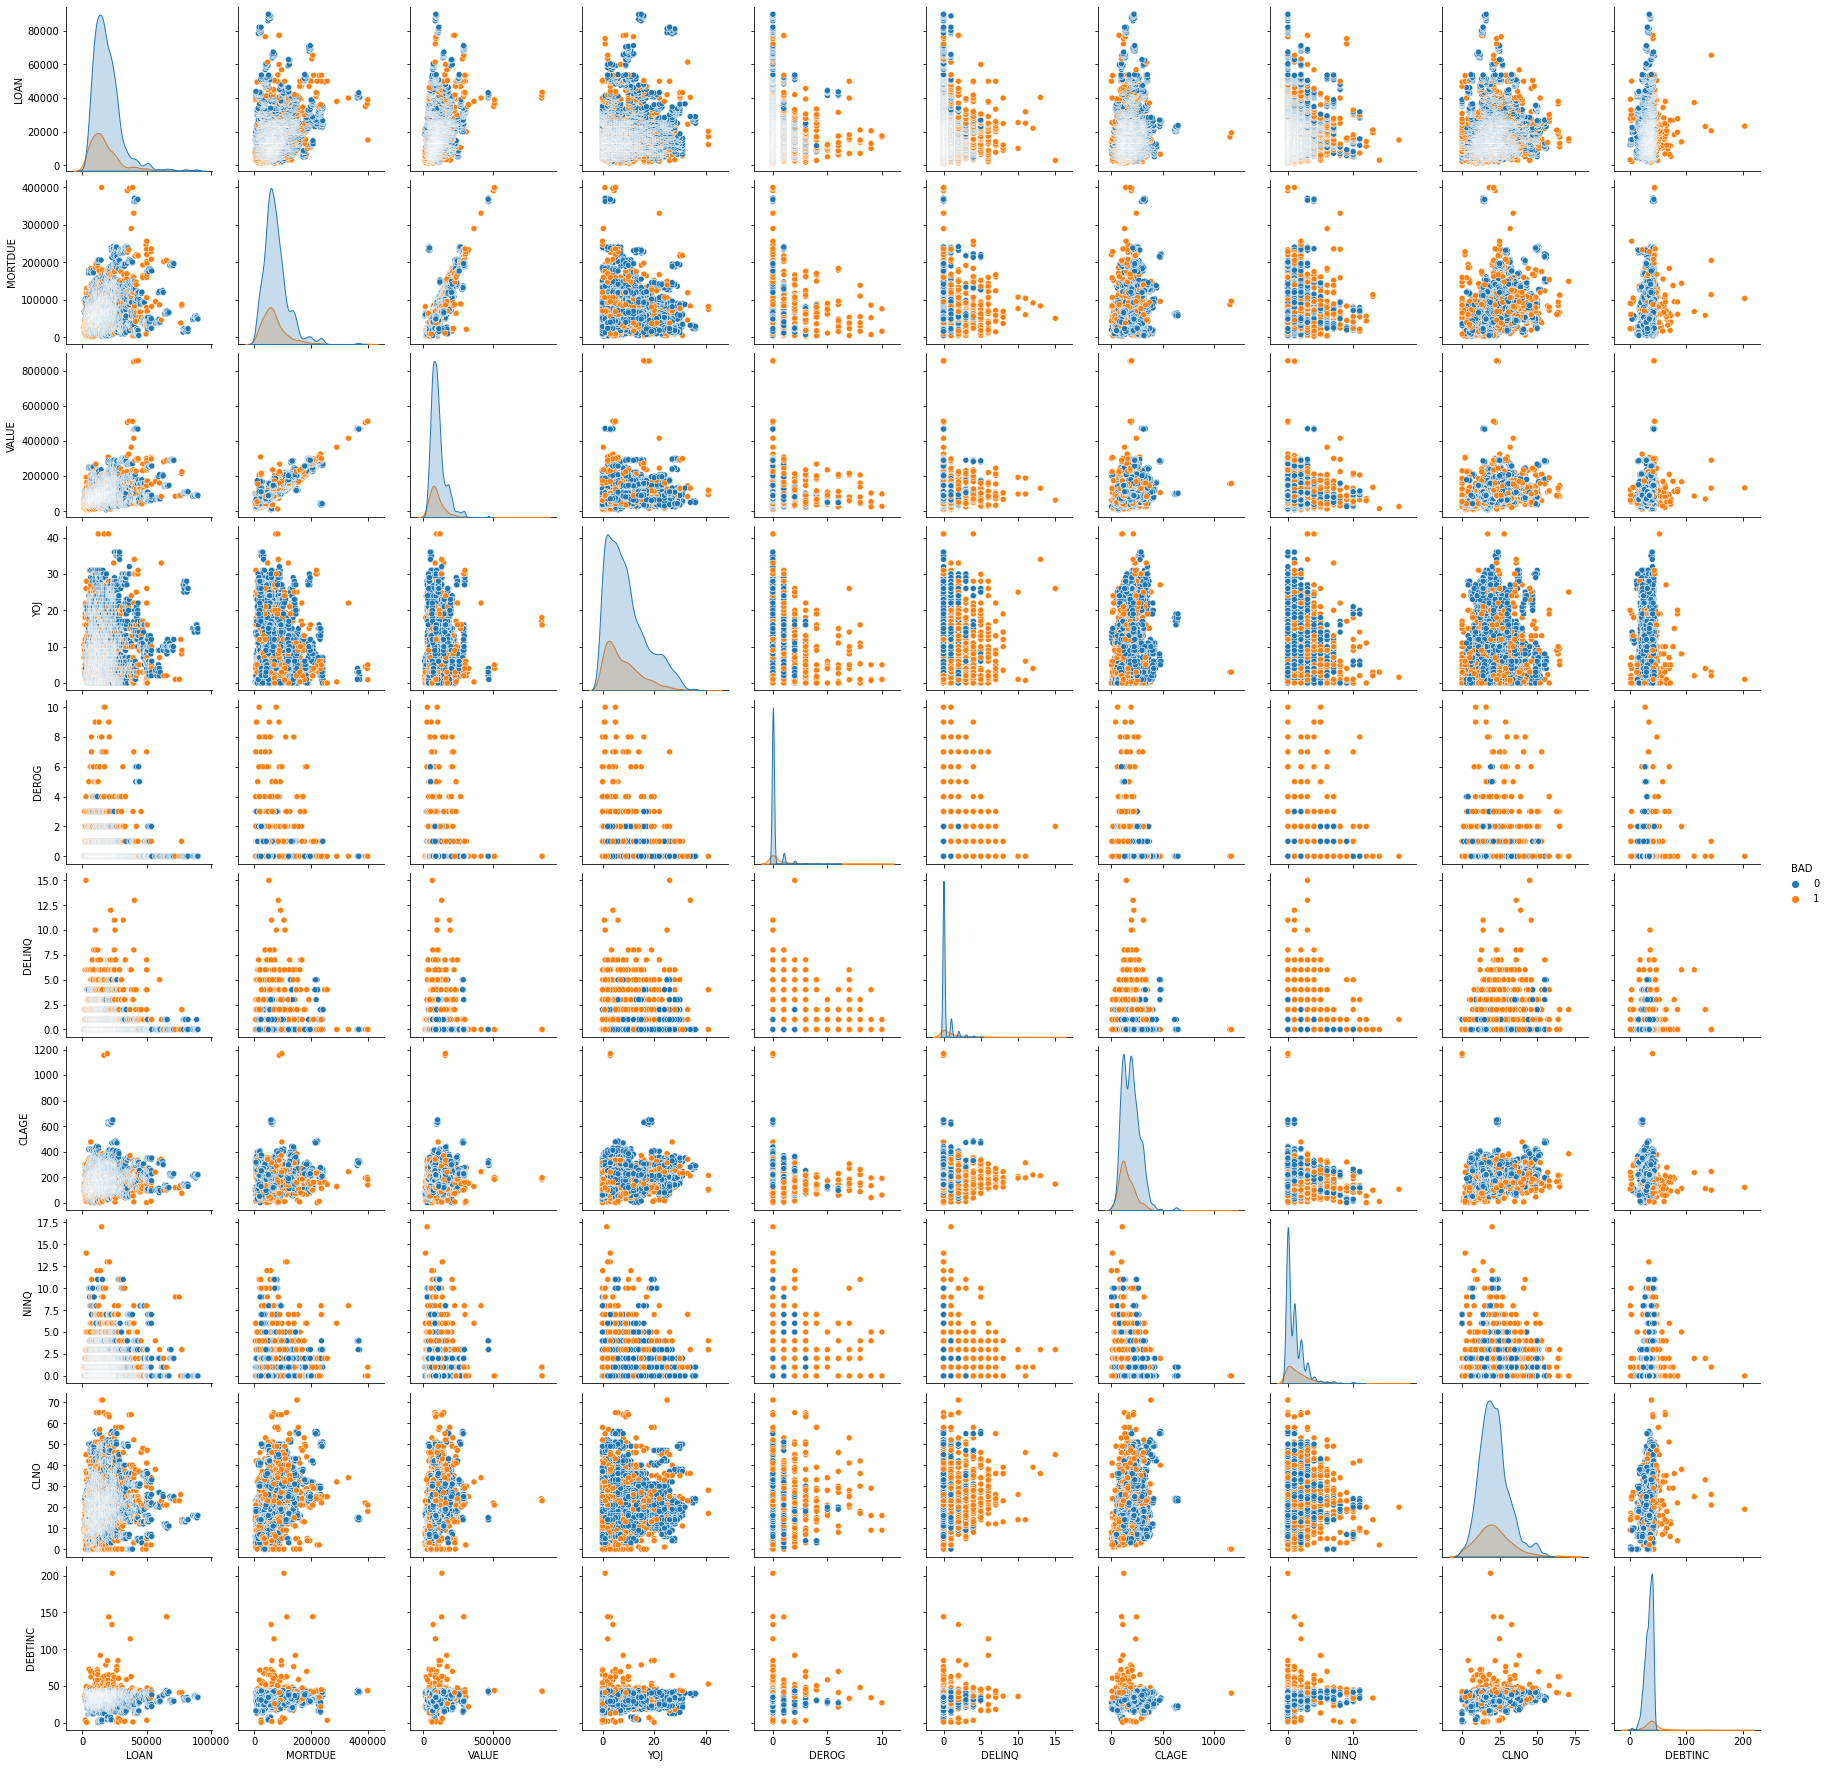

In [14]:
sns.pairplot(data, hue = 'BAD')

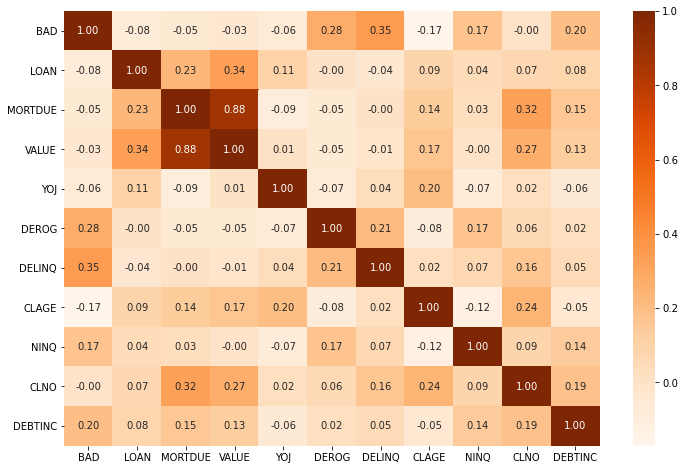

In [15]:
plt.figure(figsize=(12,8))

sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='Oranges' )
plt.show()

**Observations:**
* VALUE and MORTDUE are highly correlated 
* DEROG, DELINQ, DEBTINC, NINQ, and CLAGE are highest correlated with target variable BAD

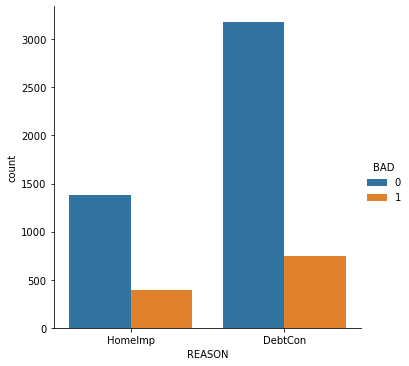

In [16]:
ax = sns.catplot(x='REASON', hue='BAD', kind='count',data=data)

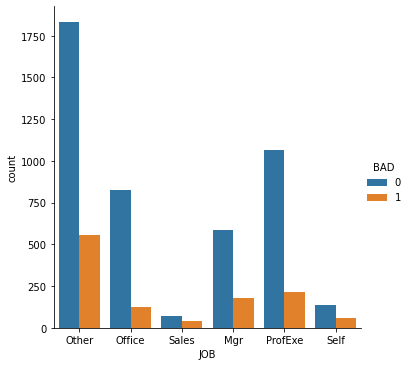

In [17]:
ax = sns.catplot(x='JOB', hue='BAD', kind='count',data=data)

BAD,0,1
LOAN,,
low,0.747149,0.252851
medium,0.817581,0.182419
high,0.837975,0.162025


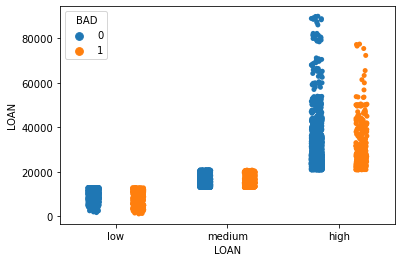

In [18]:

ax=sns.stripplot(x=pd.qcut(data['LOAN'], 3, labels=['low','medium', 'high']),y='LOAN',hue='BAD', dodge =True ,data=data)
pd.crosstab(pd.qcut(data['LOAN'], 3, labels=['low', 'medium', 'high']),data['BAD'],normalize='index')

**Observation:**
* lower LOAN amounts have more defaults

BAD,0,1
MORTDUE,,
low,0.760750,0.239250
medium,0.810364,0.189636
high,0.831863,0.168137


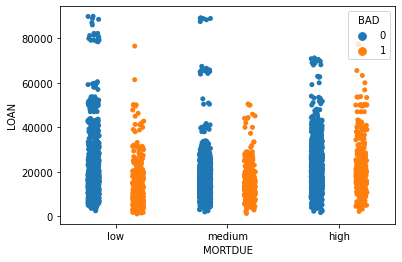

In [19]:
ax=sns.stripplot(x=pd.qcut(data['MORTDUE'], 3, labels=['low','medium', 'high']),y='LOAN',hue='BAD', dodge=True,data=data)
pd.crosstab(pd.qcut(data['MORTDUE'], 3, labels=['low', 'medium', 'high']),data['BAD'],normalize='index')

BAD,0,1
VALUE,,
low,0.777949,0.222051
medium,0.833761,0.166239
high,0.832222,0.167778


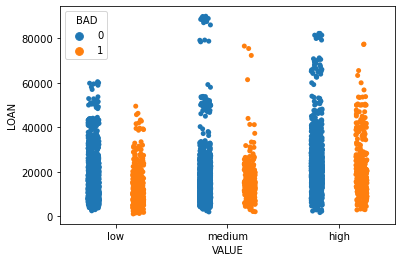

In [20]:
ax=sns.stripplot(x=pd.qcut(data['VALUE'], 3, labels=['low','medium', 'high']),y='LOAN',hue='BAD', dodge=True,data=data)
pd.crosstab(pd.qcut(data['VALUE'], 3, labels=['low', 'medium','high']),data['BAD'],normalize='index')

BAD,0,1
DEROG,,
low,0.578151,0.421849
high,0.253846,0.746154


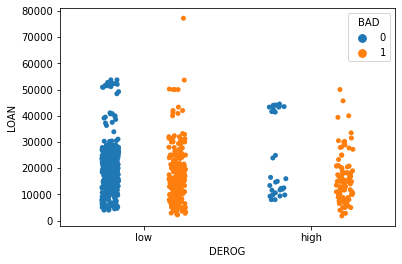

In [21]:
ax=sns.stripplot(x=pd.cut(data['DEROG'], bins=[0,2,20], labels=['low', 'high']),y='LOAN',hue='BAD', dodge=True,data=data)
pd.crosstab(pd.cut(data['DEROG'], bins=[0,2,20], labels=['low', 'high']),data['BAD'],normalize='index')

**Observations:**
* loans with higher DEROG (more than 2) have significantely more defaults

BAD,0,1
DELINQ,,
low,0.630531,0.369469
high,0.326599,0.673401


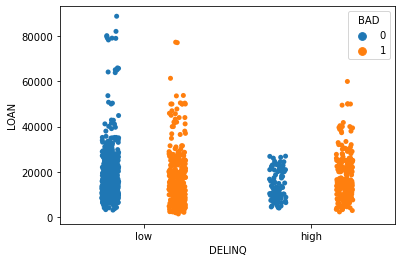

In [22]:
ax=sns.stripplot(x=pd.cut(data['DELINQ'], bins=[0,2,20], labels=['low', 'high']),y='LOAN',hue='BAD', dodge=True,data=data)
pd.crosstab(pd.cut(data['DELINQ'], bins=[0,2,20], labels=['low', 'high']),data['BAD'],normalize='index')

**Observations:**
* loans with higher DELINQ (more than 2) have significantely more defaults

BAD,0,1
CLAGE,,
low,0.720276,0.279724
medium,0.806794,0.193206
high,0.883227,0.116773


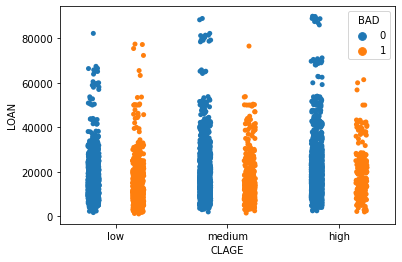

In [23]:
ax=sns.stripplot(x=pd.qcut(data['CLAGE'], 3, labels=['low','medium', 'high']),y='LOAN',hue='BAD', dodge=True,data=data)
pd.crosstab(pd.qcut(data['CLAGE'], 3, labels=['low', 'medium','high']),data['BAD'],normalize='index')

**Observations:**
* loans with lower credit line ages have significantely more defaults

BAD,0,1
DEBTINC,,
low,0.946588,0.053412
high,0.901046,0.098954


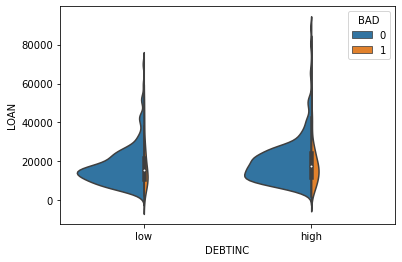

In [24]:
#ax=sns.stripplot(x=pd.cut(data['DEBTINC'], bins=[0,30,204], labels=['low','high']),y='LOAN',hue='BAD', dodge=True,data=data)
ax=sns.violinplot(x=pd.cut(data['DEBTINC'], bins=[0,30,204], labels=['low','high']), y='LOAN', hue='BAD',scale='count',split=True,data=data)
pd.crosstab(pd.cut(data['DEBTINC'], bins=[0,30,204], labels=['low', 'high']),data['BAD'],normalize='index')

# EDA Summary
* Most of DEBTINC nulls values occurr for default loans (BAD=1). Suggests strong relationship. 
* Only 20% of loans default, so splitting the data into training and testing sets will benefit from being stratified. 
* There are relativiely few null values for all features except DEBTINC.  Numerical non-skewed features have been imputed with median values. Highly skewed and categorical values have been imputed with the most frequent values. 
* Heatmap correlation analysis shows no variables are strongly correlated with BAD loans, only DEROG and DELINQ are semi-strongly correlated with BAD. 
* Variables LOAN and MORTDUE are strongly correlated, so one could be dropped.
* Grouping LOAN amounts reveals that low LOAN amounts have more loans that default compared to medium/high low amounts. Same is true for MORTDUE, but again, these are highly correlated. 
* Grouping number of DEROG and DELINQ marks reveals those with higher numbers have significately more loans that default. 
* Grouping credit line ages shows that applicants with minimal credit line ages have more default loans. 



## Data Prep

### Clipping Outliers 
1.  Cap outliners at the 5% and 95% 

In [25]:
cols = ['LOAN', 'MORTDUE', 'VALUE']

for c in cols:
    data[c]=data[c].clip(data[c].quantile(0.02), data[c].quantile(0.98))
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18361.281879,10028.745196,4500.000000,11100.000000,16300.000000,23300.000000,50782.000000
MORTDUE,5442.0,72923.975226,40555.001437,11272.460000,46276.000000,65019.000000,91488.000000,199041.760000
VALUE,5848.0,100569.831043,49872.833873,30808.880000,66075.500000,89235.500000,119824.250000,258757.320000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


### Imputing Null Values 
1.  Fill numerical missing values with median
2.  Fill categorical values with most frequent value (mode)

In [26]:
#data.dropna(inplace=True)

# Create indicator variable that keeps track of which DEBTINC has null values. 
data['DEBTINC_MISS']=np.where(data['DEBTINC'].isnull(),1,0)

data['MORTDUE'].fillna(data['MORTDUE'].median(),inplace=True)
data['VALUE'].fillna(data['VALUE'].median(),inplace=True)
data['CLAGE'].fillna(data['CLAGE'].median(),inplace=True)
data['DEBTINC'].fillna(data['DEBTINC'].median(),inplace=True)
data['CLNO'].fillna(data['CLNO'].median(),inplace=True)
data['YOJ'].fillna(data['YOJ'].median(),inplace=True)

data['REASON'].fillna(value = 'DebtCon',inplace = True)
data['JOB'].fillna(value = 'Other',inplace = True)
data['DEROG'].fillna(value=0,inplace=True)
data['DELINQ'].fillna(value=0,inplace=True)
data['NINQ'].fillna(value=0,inplace=True)


In [27]:
df=pd.concat([data.isnull().sum(),data.isnull().sum()/data.shape[0]*100], axis=1)
df.rename(columns={0:'# Null', 1:'% of Total'}, inplace=True)
print("Null Values")
print(df)
print('\n')
print(data.nunique()) # Number of unique values in a column
    

Null Values
              # Null  % of Total
BAD                0         0.0
LOAN               0         0.0
MORTDUE            0         0.0
VALUE              0         0.0
REASON             0         0.0
JOB                0         0.0
YOJ                0         0.0
DEROG              0         0.0
DELINQ             0         0.0
CLAGE              0         0.0
NINQ               0         0.0
CLNO               0         0.0
DEBTINC            0         0.0
DEBTINC_MISS       0         0.0


BAD                2
LOAN             423
MORTDUE         4843
VALUE           5155
REASON             2
JOB                6
YOJ               99
DEROG             11
DELINQ            14
CLAGE           5314
NINQ              16
CLNO              62
DEBTINC         4693
DEBTINC_MISS       2
dtype: int64


In [28]:
# Define X and Y variables

X = data.drop(columns = {'BAD'})
Y = data['BAD'].astype('category')     

In [29]:
# Convert categorical variables to dummy variables

X = pd.get_dummies(X, drop_first=False)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LOAN            5960 non-null   int64  
 1   MORTDUE         5960 non-null   float64
 2   VALUE           5960 non-null   float64
 3   YOJ             5960 non-null   float64
 4   DEROG           5960 non-null   float64
 5   DELINQ          5960 non-null   float64
 6   CLAGE           5960 non-null   float64
 7   NINQ            5960 non-null   float64
 8   CLNO            5960 non-null   float64
 9   DEBTINC         5960 non-null   float64
 10  DEBTINC_MISS    5960 non-null   int64  
 11  REASON_DebtCon  5960 non-null   uint8  
 12  REASON_HomeImp  5960 non-null   uint8  
 13  JOB_Mgr         5960 non-null   uint8  
 14  JOB_Office      5960 non-null   uint8  
 15  JOB_Other       5960 non-null   uint8  
 16  JOB_ProfExe     5960 non-null   uint8  
 17  JOB_Sales       5960 non-null   u

In [30]:
#Normalization for Logistic Regression
#from sklearn.preprocessing import StandardScaler
#SS = StandardScaler()
#X_Norm = pd.DataFrame(SS.fit_transform(X), columns=X.columns)

<span style="font-family: Arial; font-weight:bold;font-size:2.3em;color:#fa9200;"> 1. Baseline Models (no feature selections or tweaking)

## Logistic Regression

In [31]:
#splitting the data into test and train for logistic regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state = 0, stratify = Y) 
print(X_train.shape, X_test.shape)

#import logistic regression model
from sklearn.linear_model import LogisticRegression

# create model
model = LogisticRegression()

# fit model to training data
model.fit(X_train,y_train)

#classifier performance on test set
model.score(X_test,y_test)

# make predictions
pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

(4172, 19) (1788, 19)


## Note on Performance Metric.
There many performance metrics to choose from, but we want to minimize false negatives, ie, predicting that a loan will be repaid when it would default in reality. Minimizing FN is equivalent to making TP/(TP+FN) as close to 1.00 as possible.  TP/(TP+FN) = Recall, so our aim is to maximize Recall.  


Prediction on Train Set


              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3340
           1       0.66      0.04      0.07       832

    accuracy                           0.80      4172
   macro avg       0.73      0.52      0.48      4172
weighted avg       0.78      0.80      0.73      4172



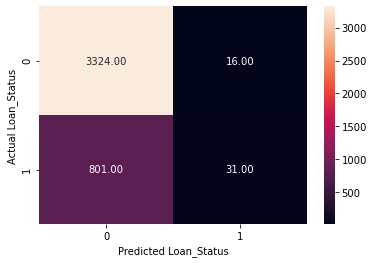

Prediction on Test Set


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1431
           1       0.75      0.03      0.05       357

    accuracy                           0.80      1788
   macro avg       0.78      0.51      0.47      1788
weighted avg       0.79      0.80      0.72      1788



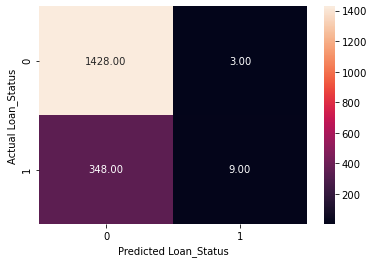



Accuracy on train data: 0.8041706615532119
Accuracy on test data: 0.8036912751677853
Recall on train data: 0.5162345981114693
Recall on test data: 0.5115568239874566
Precision on train data: 0.732696324951644
Precision on test data: 0.777027027027027


In [32]:
#import performance measure tools
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
reg0_recall_train = recall_score(y_train, pred_train, average="macro")
reg0_recall_test = recall_score(y_test, y_pred, average="macro")
reg0_acc_train = accuracy_score(y_train, pred_train)
reg0_acc_test = accuracy_score(y_test, y_pred)
reg0_prec_train = precision_score(y_train, pred_train, average="macro")
reg0_prec_test = precision_score(y_test, y_pred, average="macro")


## Create Confusion Matrix
def draw_cm( actual, predicted ):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Actual Loan_Status')
    plt.xlabel('Predicted Loan_Status')
    plt.show()


print("Prediction on Train Set")
print("\n")
print(classification_report(y_train , pred_train))

draw_cm(y_train,pred_train)

print("Prediction on Test Set")
print("\n")

print(classification_report(y_test, y_pred))

draw_cm(y_test,y_pred)


print("\n")

print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, y_pred))
print('Recall on train data:',recall_score(y_train, pred_train, average="macro") )
print('Recall on test data:', recall_score(y_test, y_pred, average="macro"))
print('Precision on train data:',precision_score(y_train, pred_train,average='macro') )
print('Precision on test data:', precision_score(y_test, y_pred, average='macro'))

**Observation:**
* Accuracy of regression is 80% which is close to baseline of 80% 
* Recall for train is 52% and test is 51% 

## Decision Tree

In [33]:
## Split into training and test set
from sklearn.model_selection import train_test_split

# Split in train and test (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7, stratify = Y)
# Further splt the train into train and validation (70:30)
#X_train, X_val, y_train, y_val =  train_test_split(X_train, y_train, test_size=0.30,random_state=7, stratify = y_train )

Prediction on Train Set


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



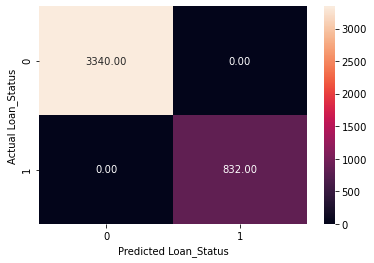

Prediction on Test Set


              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1431
           1       0.69      0.66      0.68       357

    accuracy                           0.87      1788
   macro avg       0.80      0.79      0.80      1788
weighted avg       0.87      0.87      0.87      1788



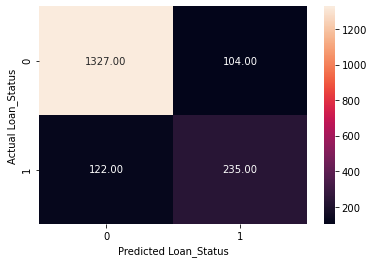

Accuracy on train data: 1.0
Accuracy on test data: 0.8736017897091722
Recall on train data: 1.0
Recall on test data: 0.7927934276435942
Precision on train data: 1.0
Precision on test data: 0.8045096709967814




In [34]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
# Uncomment below to answer

# initialise the decision tree criterion  = 'entropy'.
dtc =  DecisionTreeClassifier(criterion = 'entropy', random_state = 42)

# fit the tree (fully grown) and report the metrics on the train set.

dtc.fit(X_train,y_train)
pred_train = dtc.predict(X_train)
y_pred = dtc.predict(X_test)

print("Prediction on Train Set")
print("\n")
print(classification_report(y_train , pred_train))

draw_cm(y_train,pred_train)

print("Prediction on Test Set")
print("\n")

print(classification_report(y_test, y_pred))

draw_cm(y_test,y_pred)


print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, y_pred))
print('Recall on train data:',recall_score(y_train, pred_train, average="macro") )
print('Recall on test data:', recall_score(y_test, y_pred, average="macro"))
print('Precision on train data:',precision_score(y_train, pred_train,average='macro') )
print('Precision on test data:', precision_score(y_test, y_pred, average='macro'))

dtc0_recall_train = recall_score(y_train, pred_train, average="macro")
dtc0_recall_test = recall_score(y_test, y_pred, average="macro")
dtc0_acc_train = accuracy_score(y_train, pred_train)
dtc0_acc_test = accuracy_score(y_test, y_pred)
dtc0_prec_train = precision_score(y_train, pred_train, average="macro")
dtc0_prec_test = precision_score(y_test, y_pred, average="macro")
print("\n")
#print(classification_report(y_train , dtc.predict(X_train)))
#print(classification_report(y_test , dtc.predict(X_test)))
#draw_cm(y_test,y_pred)

**Observation:**
* Accuracy of decision tree is 100% on train and 87% on test which means it is overfit 
* Recall is 100% on train and 80% on test. 

## Random Forest

Prediction on Train Set


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



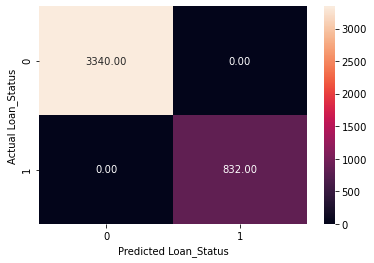

Prediction on Test Set


              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1431
           1       0.77      0.67      0.72       357

    accuracy                           0.90      1788
   macro avg       0.85      0.81      0.83      1788
weighted avg       0.89      0.90      0.89      1788



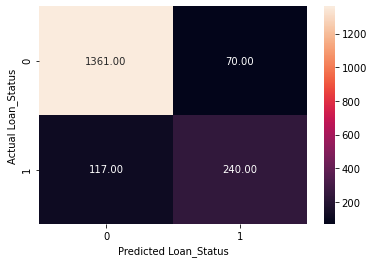

Accuracy on train data: 1.0
Accuracy on test data: 0.895413870246085
Recall on train data: 1.0
Recall on test data: 0.8116760330966768
Precision on train data: 1.0
Precision on test data: 0.8475162599851587


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'entropy')  #initialise the model 

rf.fit(X_train , y_train)
pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)


print("Prediction on Train Set")
print("\n")
print(classification_report(y_train , pred_train))

draw_cm(y_train,pred_train)

print("Prediction on Test Set")
print("\n")

print(classification_report(y_test, y_pred))

draw_cm(y_test,y_pred)


print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, y_pred))
print('Recall on train data:',recall_score(y_train, pred_train, average="macro") )
print('Recall on test data:', recall_score(y_test, y_pred, average="macro"))
print('Precision on train data:',precision_score(y_train, pred_train,average='macro') )
print('Precision on test data:', precision_score(y_test, y_pred, average='macro'))


#Report the metrics on the train and the validation set here
rf0 = recall_score(y_test, y_pred, average="macro")
rf0_recall_train = recall_score(y_train, pred_train, average="macro")
rf0_recall_test = recall_score(y_test, y_pred, average="macro")
rf0_acc_train = accuracy_score(y_train, pred_train)
rf0_acc_test = accuracy_score(y_test, y_pred)
rf0_prec_train = precision_score(y_train, pred_train, average="macro")
rf0_prec_test = precision_score(y_test, y_pred, average="macro")

#print(classification_report(y_train, rf.predict(X_train)))
#print(classification_report(y_test, y_pred))
#draw_cm(y_test,y_pred)


**Observation:**
* Accuracy of random forest is 100% on train and 90% on test which means it is overfit 
* Recall for both train is 100% on train and 80% on test. 

In [36]:
models=pd.DataFrame({'Model':['Logistic Regression', 'Decision Tree', 'Random Forest'],
                     'Model Tweaking':['None', 'None', 'None'],
                     'Train Acc':[reg0_acc_train,dtc0_acc_train,rf0_acc_train],
                     'Test Acc':[reg0_acc_test,dtc0_acc_test,rf0_acc_test], 
                    'Train Recall':[reg0_recall_train,dtc0_recall_train,rf0_recall_train],
                     'Test Recall':[reg0_recall_test,dtc0_recall_test,rf0_recall_test],
                    'Train Precision':[reg0_prec_train,dtc0_prec_train,rf0_prec_train],
                     'Test Precision':[reg0_prec_test,dtc0_prec_test,rf0_prec_test]})
models

,Model,Model Tweaking,Train Acc,Test Acc,Train Recall,Test Recall,Train Precision,Test Precision
0,Logistic Regression,None,0.804171,0.803691,0.516235,0.511557,0.732696,0.777027
1,Decision Tree,None,1.000000,0.873602,1.000000,0.792793,1.000000,0.804510
2,Random Forest,None,1.000000,0.895414,1.000000,0.811676,1.000000,0.847516


# Baseline Results
* Recall (macro avg) for logistic regression is not good at 0.51.
* Avg Recall for Decision Tree isn't bad at 0.79.
* Avg Recall for Random Forest is good at 0.81.  
* Both Decision Tree and Random Forest suffer from overfitting

<span style="font-family: Arial; font-weight:bold;font-size:2.3em;color:#fa9200;"> 2. Improved Models

## Logistic Regression (with feature selection)

In [37]:
#RFE with the logistic regression algorithm to select the top 4 features. 
from sklearn.feature_selection import RFE
model = LogisticRegression()
rfe = RFE(model, 4)
fit = rfe.fit(X, Y)
no_of_features = fit.n_features_
support_features = fit.support_
ranking_features = fit.ranking_
print("Num Features: %d" % (no_of_features))
print("Selected Features: %s" % (support_features))
print("Feature Ranking: %s" % (ranking_features))
X_sub = X.iloc[:,support_features] #updated X with the top 4 features
print(X_sub.columns)

Num Features: 4
Selected Features: [False False False False  True  True False False False False  True False
 False False  True False False False False]
Feature Ranking: [13 14 16 11  1  1 12  6  9  8  1  7  5  3  1  4  2 15 10]
Index(['DEROG', 'DELINQ', 'DEBTINC_MISS', 'JOB_Office'], dtype='object')


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_sub,Y,random_state = 0,test_size=0.30, stratify = Y) 

# create model 
model = LogisticRegression()

# fit model to training data
model.fit(X_train,y_train)

#classifier performance on test set
model.score(X_test,y_test)

# make predictions

y_pred = model.predict(X_test)
pred_train = model.predict(X_train)

Prediction on Train Set


              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3340
           1       0.80      0.43      0.56       832

    accuracy                           0.87      4172
   macro avg       0.84      0.70      0.74      4172
weighted avg       0.86      0.87      0.85      4172



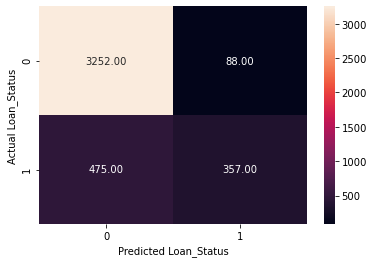

Prediction on Test Set


              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1431
           1       0.82      0.42      0.55       357

    accuracy                           0.87      1788
   macro avg       0.84      0.70      0.74      1788
weighted avg       0.86      0.87      0.85      1788



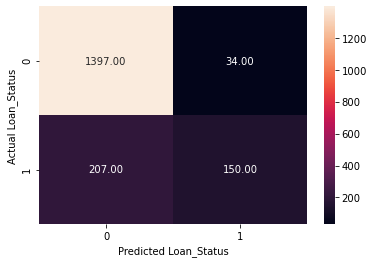

Accuracy on train data: 0.8650527325023969
Accuracy on test data: 0.8652125279642058
Recall on train data: 0.7013696165361585
Recall on test data: 0.6982042292808108
Precision on train data: 0.8373994205659883
Precision on test data: 0.8430825111135205




In [39]:
print("Prediction on Train Set")
print("\n")
print(classification_report(y_train , pred_train))

draw_cm(y_train,pred_train)

print("Prediction on Test Set")
print("\n")

print(classification_report(y_test, y_pred))

draw_cm(y_test,y_pred)

print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, y_pred))
print('Recall on train data:',recall_score(y_train, pred_train, average="macro") )
print('Recall on test data:', recall_score(y_test, y_pred, average="macro"))
print('Precision on train data:',precision_score(y_train, pred_train,average='macro') )
print('Precision on test data:', precision_score(y_test, y_pred, average='macro'))




reg1_recall_train = recall_score(y_train, pred_train, average="macro")
reg1_recall_test = recall_score(y_test, y_pred, average="macro")
reg1_acc_train = accuracy_score(y_train, pred_train)
reg1_acc_test = accuracy_score(y_test, y_pred)
reg1_prec_train = precision_score(y_train, pred_train, average="macro")
reg1_prec_test = precision_score(y_test, y_pred, average="macro")

print("\n")


## Decision Tree (with gridsearch and class weights)

In [40]:
# Split in train and test (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7, stratify=Y)

Prediction on Train Set


              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3340
           1       0.59      0.82      0.69       832

    accuracy                           0.85      4172
   macro avg       0.77      0.84      0.79      4172
weighted avg       0.88      0.85      0.86      4172



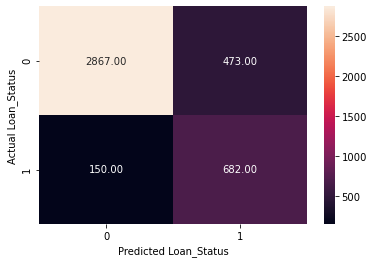

Prediction on Test Set


              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1431
           1       0.56      0.78      0.65       357

    accuracy                           0.83      1788
   macro avg       0.75      0.81      0.77      1788
weighted avg       0.86      0.83      0.84      1788



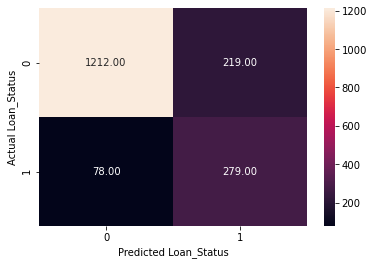

Accuracy on train data: 0.8506711409395973
Accuracy on test data: 0.8338926174496645
Recall on train data: 0.8390473859972363
Recall on test data: 0.8142363863784507
Precision on train data: 0.7703789636504254
Precision on test data: 0.7498879237881759




In [41]:
from sklearn.model_selection import GridSearchCV
#dtcf = DecisionTreeClassifier(max_depth = 13, criterion='entropy', random_state=42)
dtcf = DecisionTreeClassifier(random_state=42,class_weight={0:0.20,1:0.80} )

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtcf, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtcf = grid_obj.best_estimator_


# Fit the data on the train set here
dtcf.fit(X_train, y_train)
y_pred = dtcf.predict(X_test)
pred_train = dtcf.predict(X_train)

print("Prediction on Train Set")
print("\n")
print(classification_report(y_train , pred_train))

draw_cm(y_train,pred_train)

print("Prediction on Test Set")
print("\n")

print(classification_report(y_test, y_pred))

draw_cm(y_test,y_pred)


print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, y_pred))
print('Recall on train data:',recall_score(y_train, pred_train, average="macro") )
print('Recall on test data:', recall_score(y_test, y_pred, average="macro"))
print('Precision on train data:',precision_score(y_train, pred_train,average='macro') )
print('Precision on test data:', precision_score(y_test, y_pred, average='macro'))


dtc1 = recall_score(y_test, y_pred, average="macro")
dtc1_recall_train = recall_score(y_train, pred_train, average="macro")
dtc1_recall_test = recall_score(y_test, y_pred, average="macro")
dtc1_acc_train = accuracy_score(y_train, pred_train)
dtc1_acc_test = accuracy_score(y_test, y_pred)
dtc1_prec_train = precision_score(y_train, pred_train, average="macro")
dtc1_prec_test = precision_score(y_test, y_pred, average="macro")
print("\n")
#print(classification_report(y_train , dtc.predict(X_train)))
#print(classification_report(y_test , dtcf.predict(X_test)))
#draw_cm(y_test,y_pred)


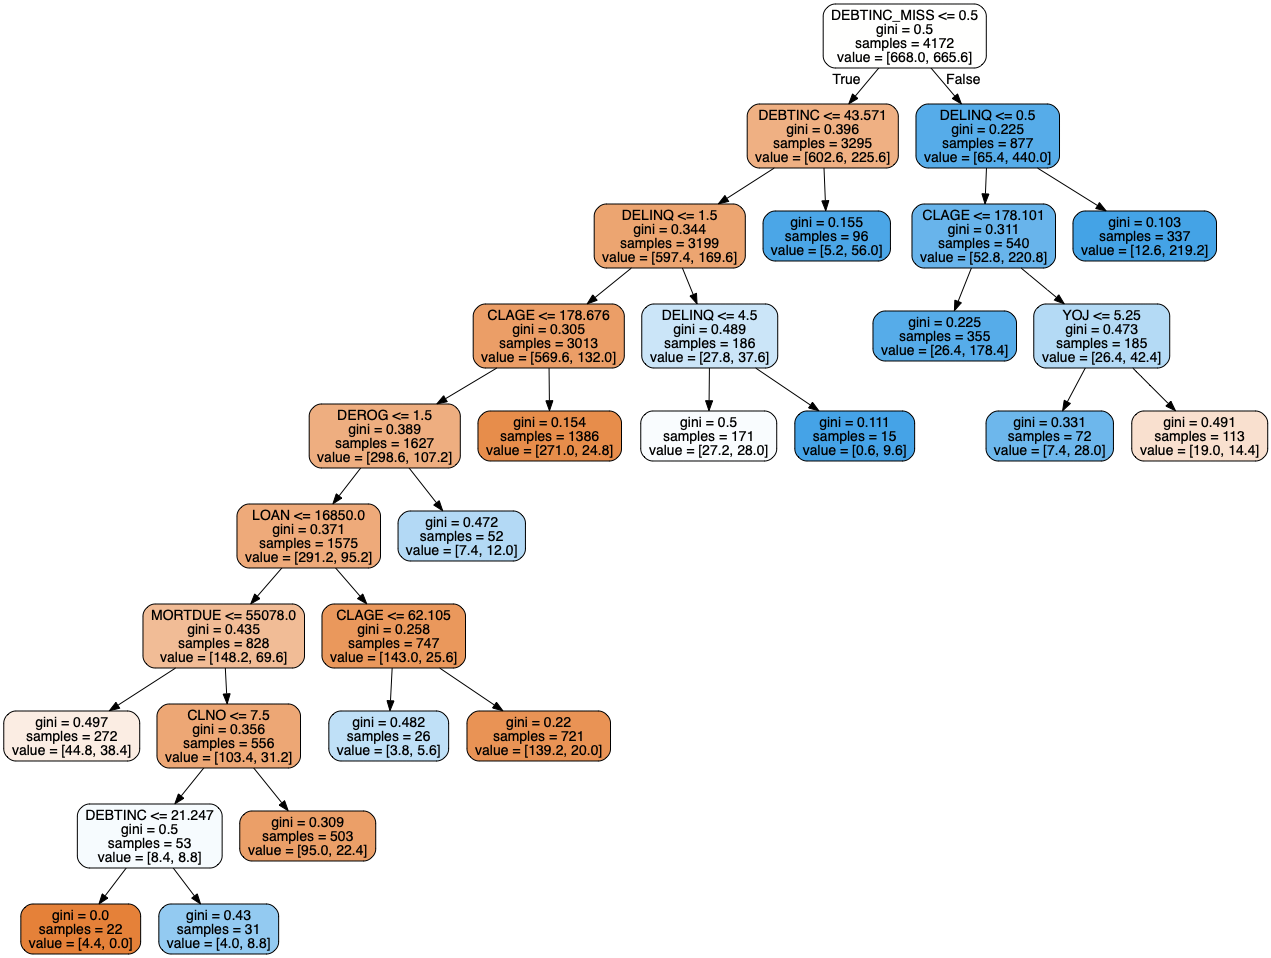

In [42]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

#fill in the blanks below. Pass the columns of the train data as feature_names. 

dot_data = StringIO()
export_graphviz(dtcf, out_file=dot_data, filled  = True, rounded = True, feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

In [43]:
# Text report showing the rules of a decision tree -
from sklearn import tree
print(tree.export_text(dtcf,feature_names=X_train.columns.tolist(),show_weights=True))

|--- DEBTINC_MISS <= 0.50
|   |--- DEBTINC <= 43.57
|   |   |--- DELINQ <= 1.50
|   |   |   |--- CLAGE <= 178.68
|   |   |   |   |--- DEROG <= 1.50
|   |   |   |   |   |--- LOAN <= 16850.00
|   |   |   |   |   |   |--- MORTDUE <= 55078.00
|   |   |   |   |   |   |   |--- weights: [44.80, 38.40] class: 0
|   |   |   |   |   |   |--- MORTDUE >  55078.00
|   |   |   |   |   |   |   |--- CLNO <= 7.50
|   |   |   |   |   |   |   |   |--- DEBTINC <= 21.25
|   |   |   |   |   |   |   |   |   |--- weights: [4.40, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- DEBTINC >  21.25
|   |   |   |   |   |   |   |   |   |--- weights: [4.00, 8.80] class: 1
|   |   |   |   |   |   |   |--- CLNO >  7.50
|   |   |   |   |   |   |   |   |--- weights: [95.00, 22.40] class: 0
|   |   |   |   |   |--- LOAN >  16850.00
|   |   |   |   |   |   |--- CLAGE <= 62.10
|   |   |   |   |   |   |   |--- weights: [3.80, 5.60] class: 1
|   |   |   |   |   |   |--- CLAGE >  62.10
|   |   |   |   |   |   |   |--- weigh

                     Imp
DEBTINC_MISS    0.635553
DEBTINC         0.163189
DELINQ          0.073462
CLAGE           0.061505
MORTDUE         0.015357
LOAN            0.015127
DEROG           0.014479
YOJ             0.012591
CLNO            0.008738
NINQ            0.000000
VALUE           0.000000
REASON_DebtCon  0.000000
REASON_HomeImp  0.000000
JOB_Mgr         0.000000
JOB_Office      0.000000
JOB_Other       0.000000
JOB_ProfExe     0.000000
JOB_Sales       0.000000
JOB_Self        0.000000


<AxesSubplot:xlabel='Imp'>

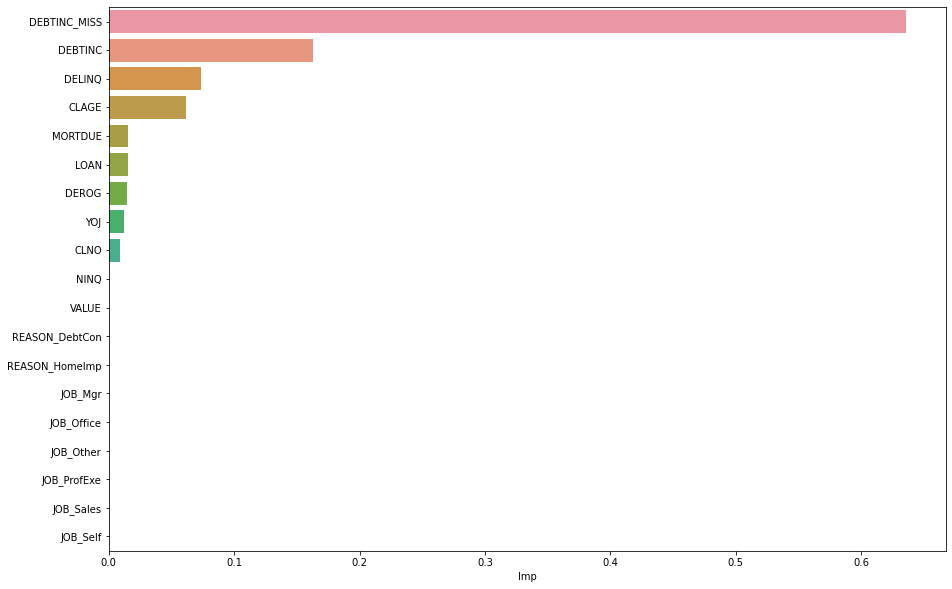

In [44]:
tree_imp=pd.DataFrame(dtcf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)
print(tree_imp)
plt.figure(figsize=(15, 10))
sns.barplot(y=tree_imp.index, x="Imp", data=tree_imp)

## Random Forest (with gridsearch and class weights)

In [ ]:

rf = RandomForestClassifier(class_weight={0:0.2,1:0.8},criterion = 'entropy')  #initialise the model 
param_dict = { 'n_estimators':[5,10,15,20,25,30,35,40,45,50],
               'max_depth':[10,15,20,25,30],
               'criterion': ['gini','entropy']
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)


from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(rf, param_dict, scoring=scorer) 
grid = grid.fit(X_train , y_train)

rf_estimator = grid.best_estimator_
y_pred = rf_estimator.predict(X_test)
pred_train = rf_estimator.predict(X_train)

print("Prediction on Train Set")
print("\n")
print(classification_report(y_train , pred_train))

draw_cm(y_train,pred_train)

print("Prediction on Test Set")
print("\n")

print(classification_report(y_test, y_pred))

draw_cm(y_test,y_pred)


print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, y_pred))
print('Recall on train data:',recall_score(y_train, pred_train, average="macro") )
print('Recall on test data:', recall_score(y_test, y_pred, average="macro"))
print('Precision on train data:',precision_score(y_train, pred_train,average='macro') )
print('Precision on test data:', precision_score(y_test, y_pred, average='macro'))

#Report the metrics on the train and the validation set here
rf1_recall_train = recall_score(y_train, pred_train, average="macro")
rf1_recall_test = recall_score(y_test, y_pred, average="macro")
rf1_prec_train = precision_score(y_train, pred_train, average="macro")
rf1_prec_test = precision_score(y_test, y_pred, average="macro")
rf1_acc_train = accuracy_score(y_train, pred_train)
rf1_acc_test = accuracy_score(y_test, y_pred)
rf1 = recall_score(y_test, y_pred, average="macro")


print("\n")

#print(classification_report(y_train, rf.predict(X_train)))
#print(classification_report(y_test, y_pred))
#draw_cm(y_test,y_pred)


In [ ]:
rf_imp=pd.DataFrame(rf_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)
print(rf_imp)
plt.figure(figsize=(15, 10))
sns.barplot(y=rf_imp.index, x="Imp", data=rf_imp)

<span style="font-family: Arial; font-weight:bold;font-size:2.3em;color:#fa9200;">3.Comparison of Model Performance

In [ ]:

models_n=pd.DataFrame({'Model':['Logistic Regression', 'Decision Tree', 'Random Forest'],
                     'Model Tweaking':['Feature selection', 'Gridsearch', 'Gridsearch'],
                      'Train Acc':[reg1_acc_train,dtc1_acc_train,rf1_acc_train],
                     'Test Acc':[reg1_acc_test,dtc1_acc_test,rf1_acc_test], 
                    'Train Recall':[reg1_recall_train,dtc1_recall_train,rf1_recall_train],
                     'Test Recall':[reg1_recall_test,dtc1_recall_test,rf1_recall_test],
                      'Train Precision':[reg1_prec_train,dtc1_prec_train,rf1_prec_train],
                     'Test Precision':[reg1_prec_test,dtc1_prec_test,rf1_prec_test]})
models=models.append(models_n)
models

In [ ]:
pd.pivot_table(models,index = ["Model", "Model Tweaking"])

***Observations:***

* Tuned Random Forest has expectional performance across all metrics.   
* Tuned Random Forest has very good performance across all metrics.  
* Tuned Logistic Regression has worst performance on recall.....our primary model metric. 
* Overfitting on recall of tuned models is minimal, with Random Forest suffering the most from overfitting.


<span style="font-family: Arial; font-weight:bold;font-size:2.3em;color:#fa9200;">4.Model Selection and Insights

***Random Forest gives the best performance on recall, but still slightly suffers from overfitting.  Also, random forest models are hard to explain and interpert, so we recommend using a decision tree model instead due to it's superior explainability in case of legal or regulatory issues.***

**Key Insights from Decision Tree**

* Customers with missing debt to income ratios (DEBTINC) are more likely to default and this is the key driver of defaults 
* Customers with higher DEBTINC ratios  are more likely to default 
* Customers that miss making minimum payments ( DELINQ marks) are more likely to default 
* Customers without much credit history (CLAGE) are more likely to default 

**Recommendations**

* Do NOT underwrite loans to customers that have missing DEBTINC data.  These almost always default. 
* Do NOT underwrite loans to customers that have DEBTINC data but have DEBTINC ratios > 43.57.  These always default.
* Do NOT underwrite loans to customers that have DEBTINC data but have DEBTINC ratios <= 43.57 and DELINQ > 1.50.    These always default. 
* Investigate as to why DEBTINC is missing in customer data since customers with these missing values are most likely to default. 
